Today's story is about Logistic Regression and we will inspect the theory behind it through an interactive example.The following dataset has 5 columns:the customer id, the age, sex, expected income and lastly the main target is if they purchased a product from an ad.Let's load the data and then extract some useful info about it:

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('Social_Network_Ads.csv')
print(df.shape[0])
print(df.isnull().sum())
print(df.describe())
print(df.info)

400
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000
<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male 

We  see that the data is clear since it doesnt have any null values and the number of customers is 400.Moreover, the mean age is around 37 years old and the estimated salary fluctuates between 15000 and 150000.

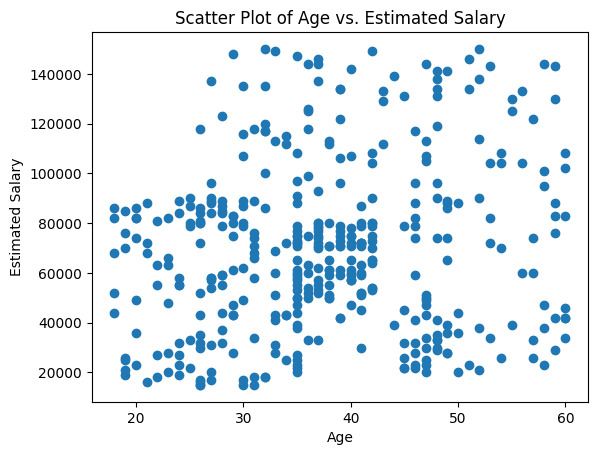

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(df['Age'], df['EstimatedSalary'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Scatter Plot of Age vs. Estimated Salary')

# Show the plot
plt.show()


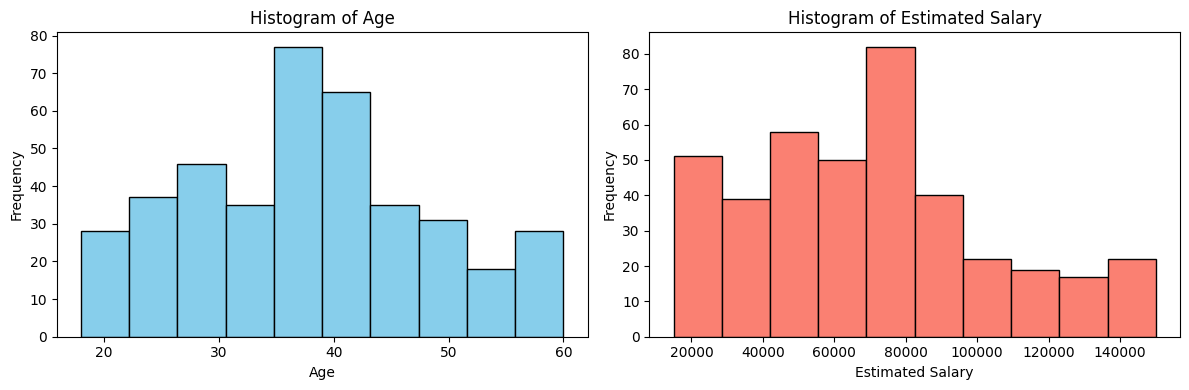

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot histogram for Age
axs[0].hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of Age')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

# Plot histogram for EstimatedSalary
axs[1].hist(df['EstimatedSalary'], bins=10, color='salmon', edgecolor='black')
axs[1].set_title('Histogram of Estimated Salary')
axs[1].set_xlabel('Estimated Salary')
axs[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


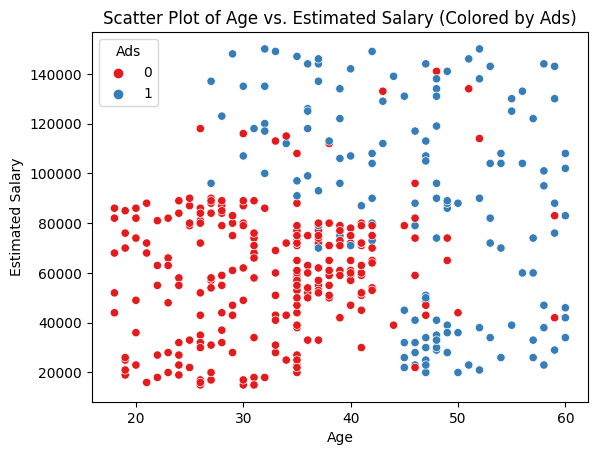

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a scatter plot with hue
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', palette='Set1')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Scatter Plot of Age vs. Estimated Salary (Colored by Ads)')

# Show the legend
plt.legend(title='Ads', loc='upper left')

# Show the plot
plt.show()


As we expected, the more money you earn the more possible is to purchase the product.Also, we can safely claim that group age 40-60 makes at majority more money than the group stage of 20-40.

In [ ]:
df= df.drop('User ID', axis=1)

In [ ]:
#print(df["Purchased"].value_counts())
#print(df["Age"].value_counts())
#print(df["EstimatedSalary"].value_counts())
print(df["Gender"].value_counts())





Female    204
Male      196
Name: Gender, dtype: int64


In [ ]:
# Define a mapping dictionary
gender_mapping = {'Male': 0, 'Female': 1}

# Apply the mapping to the 'Gender' column
df['Gender'] = df['Gender'].map(gender_mapping)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Extract the features and target
X = df[['Age', 'EstimatedSalary', 'Gender']]
y = df['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    # Fit the classifier
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy
    print(f'{name} Accuracy: {accuracy:.2f}')


Logistic Regression Accuracy: 0.65
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.89
K-Nearest Neighbors Accuracy: 0.82


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df[['Age', 'EstimatedSalary', 'Gender']]
y = df['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.2f}')


XGBoost Accuracy: 0.89


Gaussian Naive Bayes Accuracy: 0.93


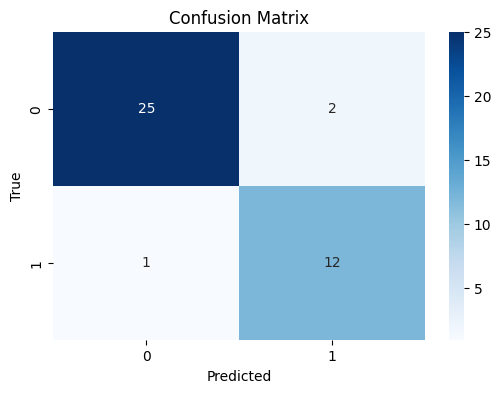

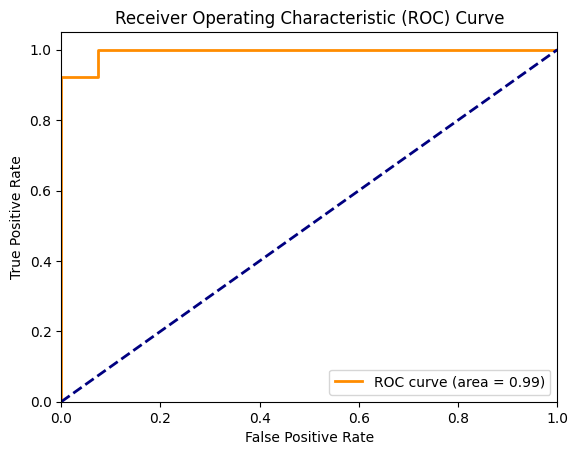

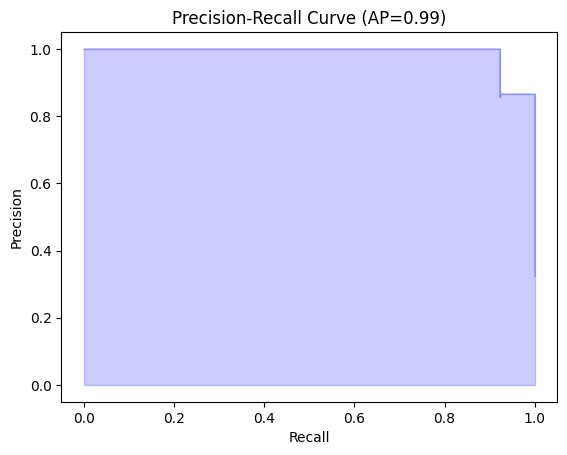

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score


# Load your dataset (replace 'your_dataset.csv' with the actual filename)
#data = pd.read_csv('your_dataset.csv')

# Extract the features and target
#X = data[['Age', 'EstimatedSalary', 'Gender']]
#y = data['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
model = GaussianNB()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Gaussian Naive Bayes Accuracy: {accuracy:.2f}')
#--------------------#
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Precision-Recall Curve and Average Precision
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
avg_precision = average_precision_score(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP={0:0.2f})'.format(avg_precision))
plt.show()

